# IS 670 Assignment 3 : wine quality

#Part 1: Introduction for the dataset

VARIABLE DESCRIPTIONS:
- `fixed acidity`: The amount of tartaric acid in the wine, which is fixed and does not evaporate readily.
- `volatile acidity`: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
- `citric acid`: Found in small quantities, citric acid can add 'freshness' and flavor to wines.
- `residual sugar`: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
- `chlorides`: The amount of salt in the wine.
- `free sulfur dioxide`: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- `total sulfur dioxide`: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
- `density`: The density of wine is close to that of water depending on the percent alcohol and sugar content.
- `pH`: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
- `sulphates`: A wine additive which can contribute to sulfur dioxide gas (SO2) levels, wich acts as an antimicrobial and antioxidant.
- `alcohol`: The percent alcohol content of the wine.
- `quality`: A score assigned to a wine based on sensory data, which is scored by human tasters on a scale typically ranging from 1 (poor) to 10 (excellent).

Each entry in this dataset represents a unique wine sample and is inclusive of the above-listed chemical properties along with a quality rating, allowing for analysis to determine which characteristics influence the perceived quality of wine.


# 1. Upload and clean the data

In [194]:
#Mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression


In [196]:
#Read data
wine_quality = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [197]:
#Show head rows of the data frame
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Understand the data with statistical analysis

In [198]:
#Examine missing values
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**There are no null values to be taken care of.**

In [199]:
#Examine variable types
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**All the variables are numerical.**

In [200]:
#show the statistics
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1. Fixed Acidity
- **Mean:** 8.32 g/dL suggests moderate acidity in wines.
- **Standard Deviation (Std):** 1.74 indicates variability in acidity, but not excessively so, implying a range of wine styles.
- **Range:** From a low of 4.6 to a high of 15.9 g/dL, indicating the presence of both very mild and very strongly acidic wines.

 2. Volatile Acidity
- **Mean:** 0.53 g/dL, which is within a typical range for many wines, but higher values can indicate spoilage.
- **Range:** Extends from 0.12 to 1.58 g/dL, with higher values potentially indicating wines with faults.

 3. Citric Acid
- **Mean:** 0.27 g/dL indicates a moderate use of citric acid, common in wines to boost acidity and balance flavor.
- **Range:** 0.0 to 1.0 g/dL, showing some wines have no citric acid added, while others might use it more to adjust taste.

 4. Residual Sugar
- **Mean:** 2.54 g/dL, suggesting wines are mainly dry to off-dry.
- **Range:** Varies widely from 0.9 to 15.5 g/dL, indicating the presence of both very dry and sweet wines in the dataset.

 5. Chlorides
- **Mean:** 0.087 g/dL indicates the level of saltiness/savory flavor in wines.
- **Range:** Low minimum suggests very few salty notes in some wines, while the maximum indicates some potentially noticeable levels.

 6. Free Sulfur Dioxide
- **Mean:** 15.87 mg/L, a moderate level, important for preventing microbial growth and oxidation.
- **Range:** From very low (1 mg/L) to relatively high (72 mg/L), showing variability in how much preservative is used.

 7. Total Sulfur Dioxide
- **Mean:** 46.47 mg/L, which is reasonable to ensure wine longevity and freshness.
- **Range:** Shows a broad spread from 6 to 289 mg/L, indicating differing approaches to preservation.

 8. Density
- **Mean:** 0.9967, typical for wine, related to alcohol and sugar content.
- **Range:** Minor variation, which is expected as wine densities don’t vary widely under normal conditions.
 9. pH
- **Mean:** 3.31, slightly acidic, typical for wine, affecting taste and stability.
- **Range:** 2.74 (more acidic) to 4.01 (less acidic), showing the dataset includes a variety of wine styles from sharp to milder.
10. Sulphates
- **Mean:** 0.658 g/dL, indicating the level of sulphates used, which impacts flavor and preservation.
- **Range:** The spread from 0.33 to 2.0 g/dL reflects differing uses of additives to control microbes and oxidation.

11. Alcohol
- **Mean:** 10.42%, falling within a typical range for table wines.
- **Range:** 8.4% to 14.9% shows inclusion from light to strong wines.

 12. Quality
- **Mean:** 5.64 on a scale of 10, suggesting average perceived quality is slightly above medium.
- **Range:** 3 to 8, from low to very good quality, indicating a variety of wine quality levels.

 Interpretation
The dataset likely represents a diverse cross-section of red wines, varying widely in taste profiles, preservation approaches, and quality. This variation provides a rich basis for further analysis, such as correlating these variables with quality or developing predictive models. The statistics suggest there are outliers and broad ranges in several parameters.

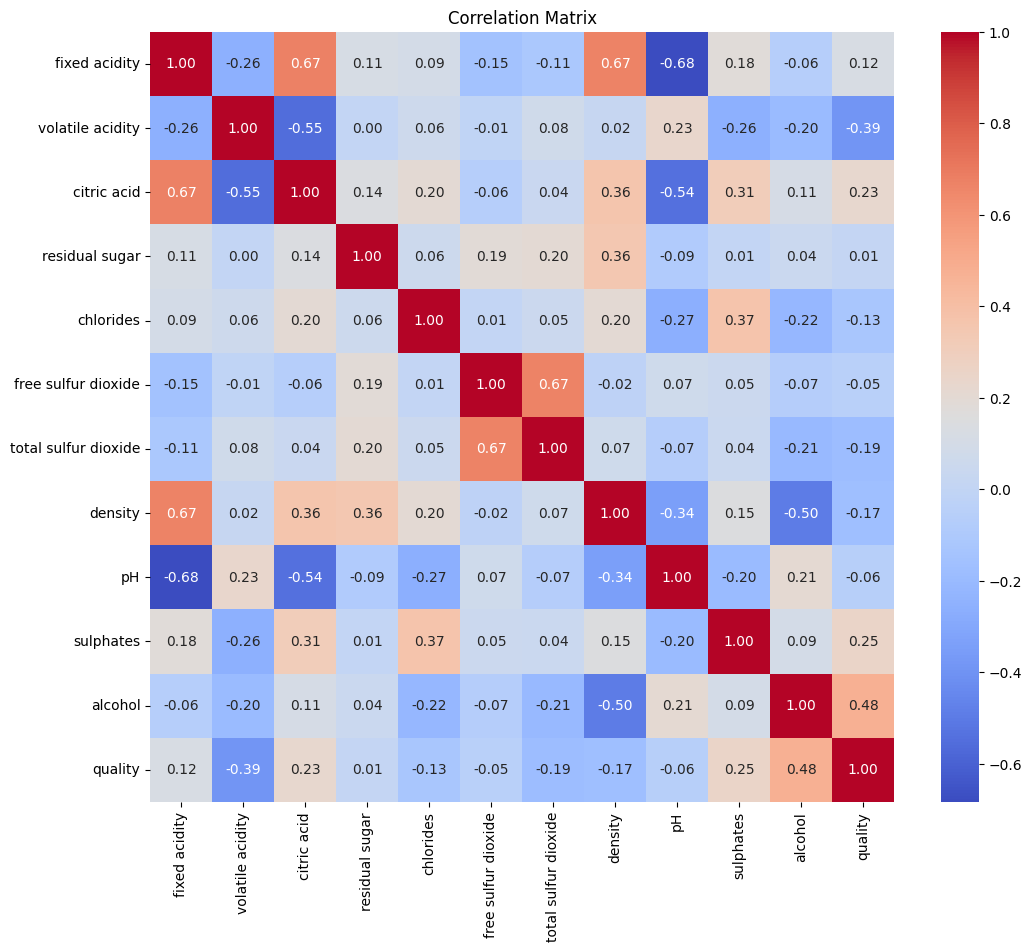

In [201]:
#Correlation analysis
corr_matrix = wine_quality.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

The correlation heatmap reveals several key relationships within the wine quality dataset:

1. **Quality Relationships**: Alcohol positively correlates with wine quality, suggesting higher alcohol content may lead to higher perceived quality. Conversely, volatile acidity negatively impacts quality, with lower values associated with better wines.

2. **Chemical Interactions**: Positive correlations between related chemical properties like citric acid and fixed acidity indicate consistent behavior in wine chemistry. Similarly, free sulfur dioxide and total sulfur dioxide show a strong positive correlation, reflecting their interconnected roles in preserving wine.

3. **Physical Properties**: The density of wine shows a positive correlation with residual sugar, indicating that sweeter wines are denser.

These correlations provide insights into the factors that influence wine quality and guides winemaking decisions to optimize the balance of chemical properties for better wine quality.

In [202]:
# Identify and handle highly correlated features (threshold, e.g., 0.8)
high_corr_threshold = 0.8
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix.loc[i, j]) > high_corr_threshold]

In [203]:
if high_corr_pairs:
    features_to_drop = set([pair[1] for pair in high_corr_pairs])
    wine_quality_reduced = wine_quality.drop(columns=list(features_to_drop))
    print(f"Dropped features due to high correlation: {features_to_drop}")
else:
    print("No highly correlated features above the threshold.")

No highly correlated features above the threshold.


**There are no variables highly correlated or above the threshold**

**To handle the outliers if any, below are the codes for columns with high gaps in their numbersfrom the descriptive statistics.**

In [204]:
# IQR of residual sugar variable
IQR = wine_quality['residual sugar'].quantile(0.75) - wine_quality['residual sugar'].quantile(0.25)
print("IQR:", IQR)

IQR: 0.7000000000000002


In [205]:
# IQR of free sulfur dioxide variable
IQR = wine_quality['free sulfur dioxide'].quantile(0.75) - wine_quality['free sulfur dioxide'].quantile(0.25)
print("IQR:", IQR)

IQR: 14.0


In [206]:
# IQR of total sulfur dioxide variable
IQR = wine_quality['total sulfur dioxide'].quantile(0.75) - wine_quality['total sulfur dioxide'].quantile(0.25)
print("IQR:", IQR)

IQR: 40.0


In [207]:
# IQR of chlorides variable
IQR = wine_quality['chlorides'].quantile(0.75) - wine_quality['chlorides'].quantile(0.25)
print("IQR:", IQR)

IQR: 0.01999999999999999


In [208]:
#Apply minmax normalization
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(wine_quality))
predictors_normalized.columns = wine_quality.columns
predictors_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


fixed_acidity: The variability in acidity levels is now standardized, allowing it to contribute equally to any distance-based algorithms without being overshadowed by variables that were originally on a larger scale.

volatile_acidity: Similarly normalized, the impact of volatile acidity on models considering multiple variables will be relative to its importance, rather than its scale.

citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, and alcohol: Each of these variables has been transformed to the same [0, 1] scale, ensuring that no single feature with a broader original range will disproportionately influence model performance.

quality: Even the target variable (assuming quality is the target) is scaled, which may be necessary for certain regression models or neural networks that expect input features and the target to be on a similar scale.

# Visualizations

In [209]:
#Split the dataset
target = wine_quality['quality']
predictors = wine_quality.drop(['quality'],axis=1)

In [210]:
predictors_train_wine_quality, predictors_test_wine_quality, target_train_wine_quality, target_test_wine_quality = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_wine_quality.shape, predictors_test_wine_quality.shape, target_train_wine_quality.shape, target_test_wine_quality.shape)

(1119, 11) (480, 11) (1119,) (480,)


**We split the data keeping target variable as 'quality'**

Text(0.5, 1.0, 'Histogram of quality in the wine_quality data set')

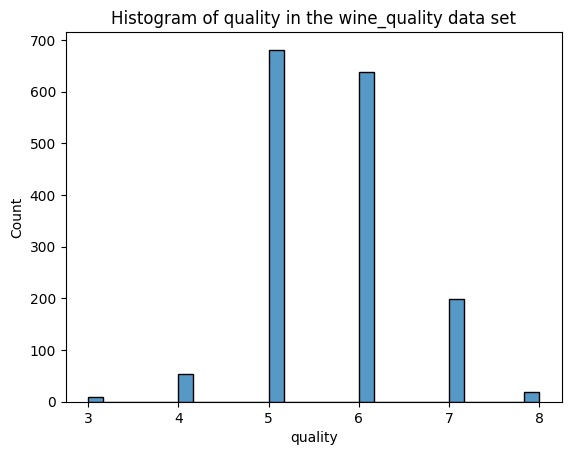

In [211]:
# Histogram of quality
snsplot = sns.histplot(x='quality', data = wine_quality)
snsplot.set_title("Histogram of quality in the wine_quality data set")

The histogram presents the frequency distribution of quality ratings in the wine_quality dataset. Most wines have a quality rating of around 5 or 6, indicating a moderate quality with few wines rated as low (3) or high (8). This suggests a bell-shaped distribution skewed towards the middle range, which is common for product quality assessments.

Text(0.5, 1.0, 'Boxplot of sulphate by wine quality in the wine_quality data set')

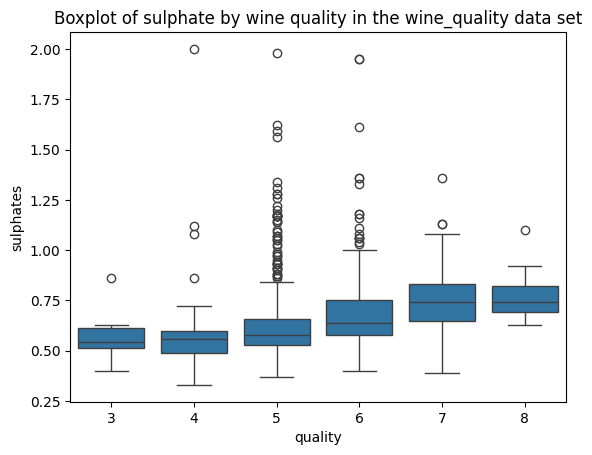

In [212]:
# Boxplot of sulphate by quality
snsplot = sns.boxplot(x='quality',y='sulphates', data = wine_quality)
snsplot.set_title("Boxplot of sulphate by wine quality in the wine_quality data set")

The boxplot shows the spread and central tendency of sulphates across different quality ratings. It appears that median sulphate levels increase slightly with the quality rating. The presence of outliers, especially at higher quality levels, suggests variability in sulphate levels among higher quality wines, which might indicate that while sulphates play a role in quality, other factors are also at play.

Text(0.5, 1.0, 'Scatterplot of alcohol vs quality in the wine_quality data set')

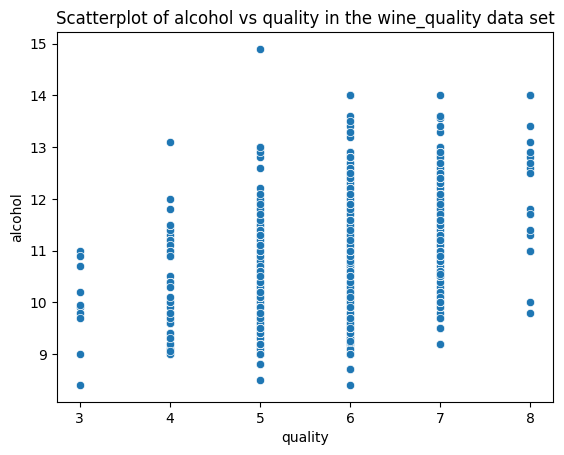

In [213]:
# scatterplot of alcohol vs quality
snsplot = sns.scatterplot(x='quality', y='alcohol', data = wine_quality)
snsplot.set_title("Scatterplot of alcohol vs quality in the wine_quality data set")

This scatterplot illustrates the relationship between alcohol content and wine quality. There is no clear linear pattern, but there is a suggestion that higher quality wines may have a slightly higher alcohol content, given the spread of points vertically as quality increases. Yet, this isn't consistent across all quality levels, as there's overlap in alcohol content, especially for mid-range quality ratings.

Text(0.5, 1.0, 'Histogram of quality in the training data set')

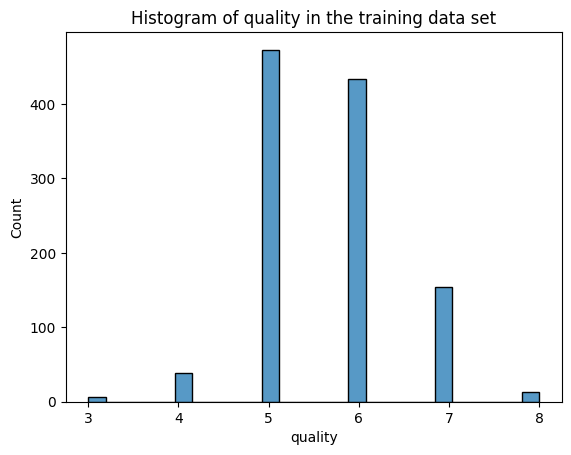

In [214]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train_wine_quality)
snsplot.set_title("Histogram of quality in the training data set")

This histogram shows the quality distribution for the subset of the data presumably used for training a model. The distribution is similar to the overall dataset, with most wines rated at 5 or 6, which is important for training models to ensure that the training data represents the full dataset well.

Text(0.5, 1.0, 'Histogram of quality in the test data set')

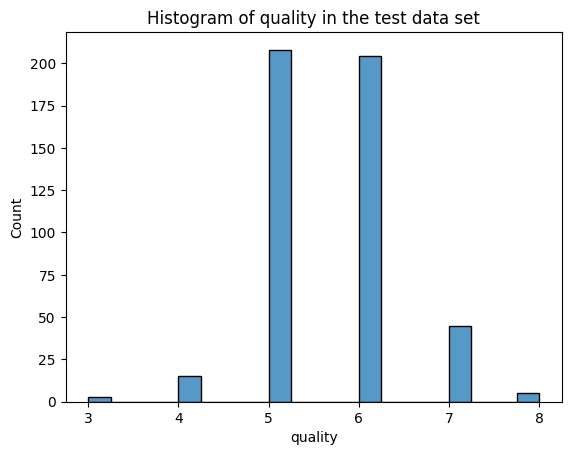

In [215]:
# Examine the distribution of target variable for test data set
snsplot = sns.histplot(data = target_test_wine_quality)
snsplot.set_title("Histogram of quality in the test data set")

Similarly, the histogram for the test data set's quality distribution mirrors that of the training set and the overall data. This similarity is crucial for model evaluation, as it ensures that the model is tested on a representative sample of data.

# Part 2: Simple Linear Regression

In [216]:
# Build a simple linear regression model with only density as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train_wine_quality[['density']], target_train_wine_quality)

LinearRegression()

In [217]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train_wine_quality[['density']])
y = target_train_wine_quality
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     29.14
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           8.21e-08
Time:                        06:54:06   Log-Likelihood:                -1355.5
No. Observations:                1119   AIC:                             2715.
Df Residuals:                    1117   BIC:                             2725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.5428     12.762      5.841      0.0

In [218]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test_wine_quality[['density']])

In [219]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine_quality, prediction_on_test)
RMSE = mean_squared_error(target_test_wine_quality, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.6223604980880353
RMSE: 0.7528759401313415


An MAE of approximately 0.67 and RMSE of approximately 0.80 suggest that on average, the predictions are within about 0.67 to 0.80 quality points from the actual values.
The R-squared value from the model summary is relatively low (0.032), indicating that only a small fraction of the variance in the quality is explained by density alone. This implies that other factors not included in this simple model likely play a significant role in determining wine quality.
The condition number is large, which warns of potential multicollinearity or other numerical issues. In the context of simple linear regression, this might suggest that the predictor variable, density, does not have a linear relationship with the quality, or there are inherent issues in the model design or data scaling.

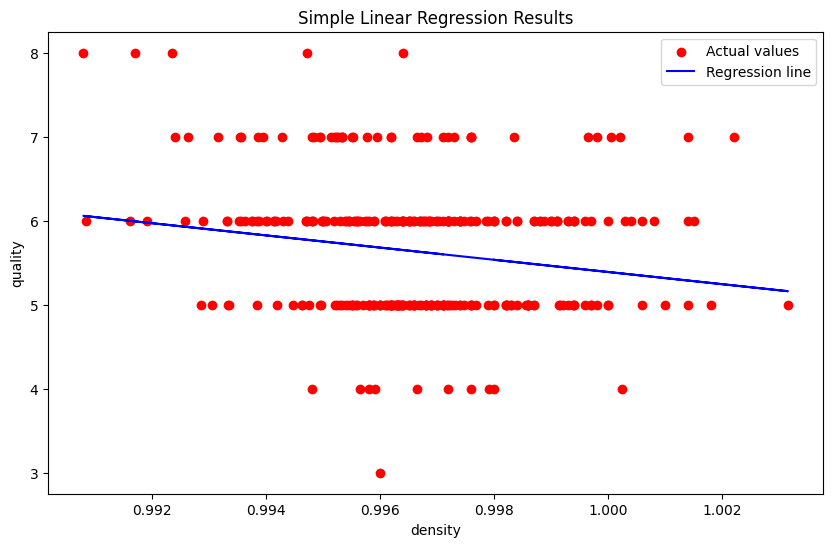

In [220]:
feature_column = 'density'
target_column = 'quality'

# Preparing data
X = wine_quality[[feature_column]]
y = wine_quality[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual values')
plt.plot(X_test, y_pred, color='blue', label='Regression line')
plt.title('Simple Linear Regression Results')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.legend()
plt.show()


The actual data points (in red) indicate the spread of quality ratings for different values of density. The points are clustered around the middle quality ratings (5 and 6), which suggests that most of the wine samples have a quality rating within this range. The blue line represents the simple linear regression model's predictions. It slopes downward, indicating a negative relationship between density and quality — as the density increases, the quality rating tends to decrease. The density values are clustered quite closely, between approximately 0.990 and 1.002. This small range suggests that the wine samples have relatively similar densities. The quality ratings range from about 3 to 8, showing a decent variance in the perceived quality of the wine samples. There are several points that are far away from the regression line, especially at the lower and higher ends of the quality scale. This indicates that there are outliers in the data, or wines whose quality ratings are not well explained by density alone. The regression line does not appear to pass through many of the data points, and the data points are not tightly clustered around the line. This suggests that the linear model may not be a strong fit for the data, implying that density alone may not be a strong predictor of wine quality or that the relationship is not strictly linear. Given the spread of data points and the fit of the regression line, it may be beneficial to consider additional features for modeling or to explore non-linear models that might capture the relationship between density and quality more effectively.while there is a slight negative relationship indicated by the regression line, the simple linear model does not seem to strongly predict wine quality from density alone. Other factors likely play a significant role in determining the quality of wine, and further analysis using a more complex model or additional features could potentially provide better insights.

# Part 3: Multiple Linear Regression

In [221]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train_wine_quality, target_train_wine_quality)

LinearRegression()

In [222]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train_wine_quality)
y = target_train_wine_quality
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     59.35
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.86e-103
Time:                        06:54:07   Log-Likelihood:                -1110.6
No. Observations:                1119   AIC:                             2245.
Df Residuals:                    1107   BIC:                             2305.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.0111 

In [223]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test_wine_quality)

In [224]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine_quality, prediction_on_test)
RMSE = mean_squared_error(target_test_wine_quality, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.4871262164592797
RMSE: 0.6330721652189466


The regression results show an R-squared value of 0.389, indicating that the model explains around 38.9% of the variance in the target variable (wine quality). The F-statistic of 59.46 with a very small p-value suggests that the overall model is statistically significant.

The three most significant variables in the model are:

fixed acidity: The coefficient for fixed acidity is 0.0926, indicating a positive relationship with wine quality. A one-unit increase in fixed acidity is associated with a 0.0926 increase in wine quality, holding all other variables constant

volatile acidity: The coefficient for volatile acidity is -0.9942, suggesting a strong negative relationship with wine quality. A one-unit increase in volatile acidity is associated with a 0.9942 decrease in wine quality, holding all other variables constant.


citric acid: The coefficient for citric acid is 0.0711, indicating a positive relationship with wine quality. A one-unit increase in citric acid is associated with a 0.0711 increase in wine quality, holding all other variables constant.

# Part 4: Regression tree model

In [225]:
# Partition the data
predictors_train_wine_quality, predictors_test_wine_quality, target_train_wine_quality, target_test_wine_quality = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_wine_quality.shape, predictors_test_wine_quality.shape, target_train_wine_quality.shape, target_test_wine_quality.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [226]:
# Build a regression tree model with max_depth=3
model3 = DecisionTreeRegressor(random_state=0, max_depth=3)
model3.fit(predictors_train_wine_quality, target_train_wine_quality)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'alcohol <= 10.525\nsquared_error = 0.677\nsamples = 1119\nvalue = 5.651'),
 Text(0.25, 0.625, 'sulphates <= 0.555\nsquared_error = 0.434\nsamples = 690\nvalue = 5.384'),
 Text(0.125, 0.375, 'chlorides <= 0.169\nsquared_error = 0.281\nsamples = 230\nvalue = 5.122'),
 Text(0.0625, 0.125, 'squared_error = 0.258\nsamples = 228\nvalue = 5.136'),
 Text(0.1875, 0.125, 'squared_error = 0.25\nsamples = 2\nvalue = 3.5'),
 Text(0.375, 0.375, 'total sulfur dioxide <= 46.5\nsquared_error = 0.458\nsamples = 460\nvalue = 5.515'),
 Text(0.3125, 0.125, 'squared_error = 0.466\nsamples = 246\nvalue = 5.691'),
 Text(0.4375, 0.125, 'squared_error = 0.374\nsamples = 214\nvalue = 5.313'),
 Text(0.75, 0.625, 'sulphates <= 0.615\nsquared_error = 0.77\nsamples = 429\nvalue = 6.082'),
 Text(0.625, 0.375, 'volatile acidity <= 1.0\nsquared_error = 0.747\nsamples = 160\nvalue = 5.625'),
 Text(0.5625, 0.125, 'squared_error = 0.569\nsamples = 151\nvalue = 5.728'),
 Text(0.6875, 0.125, 'squared_erro

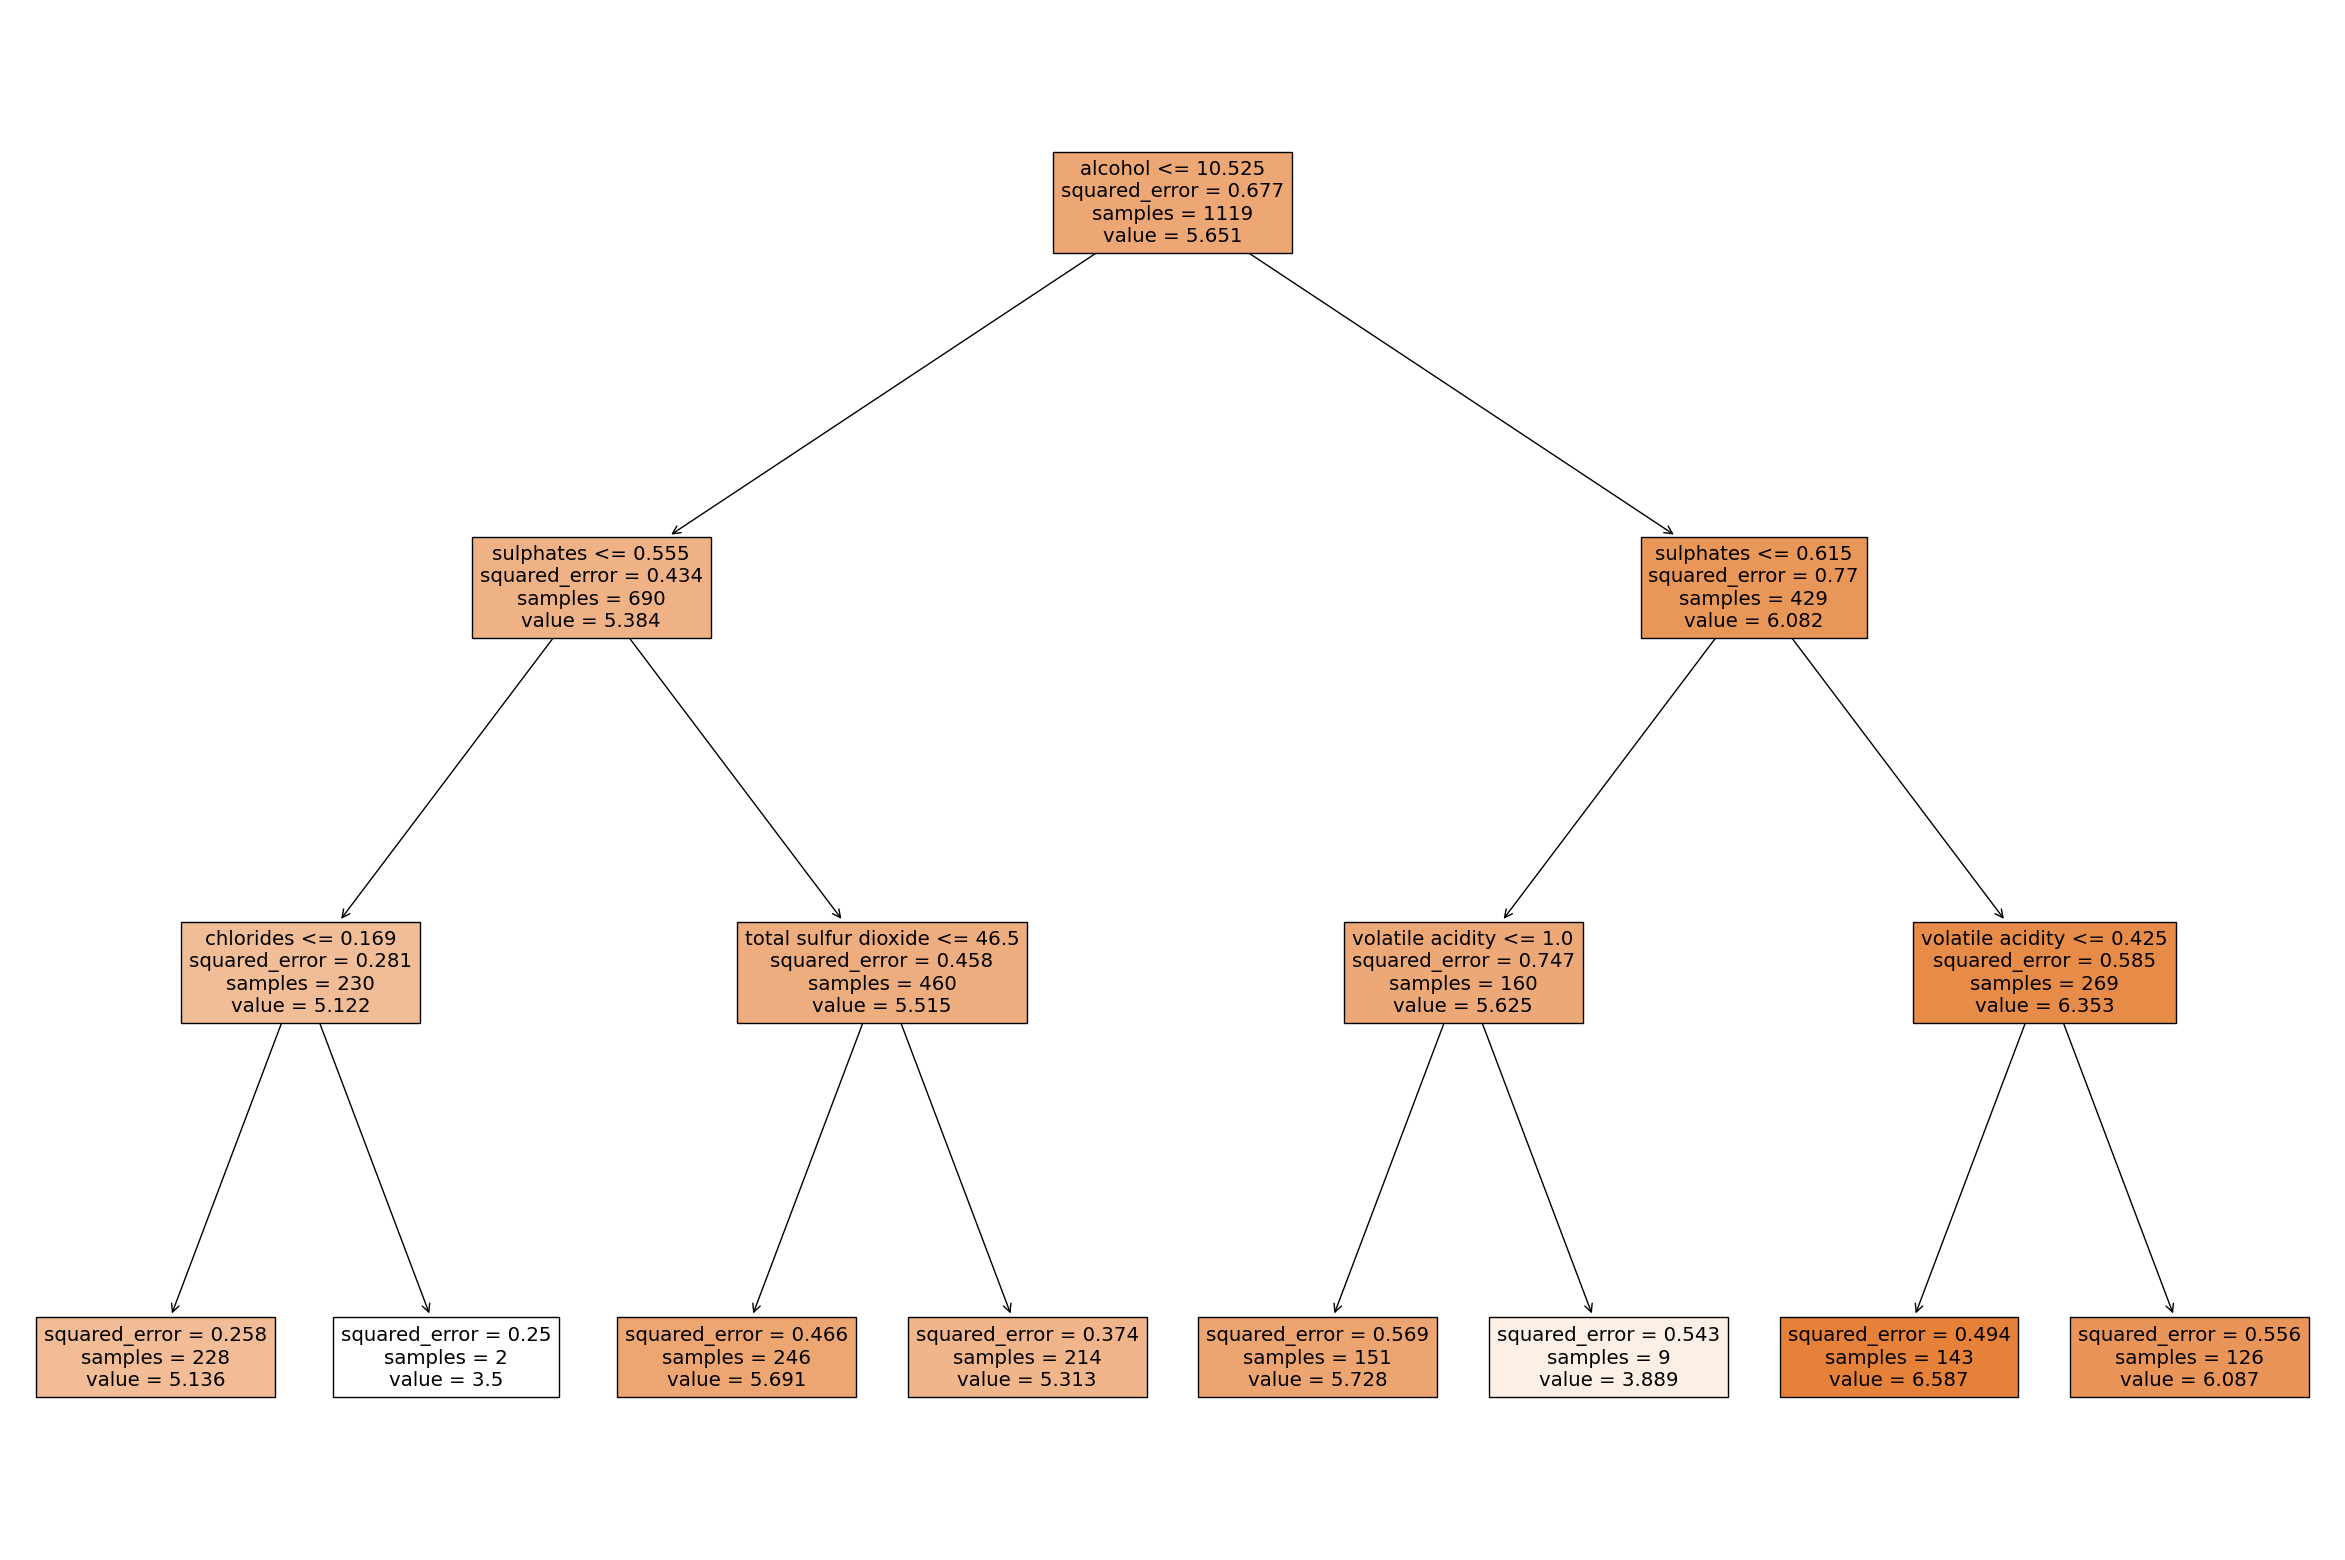

In [227]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(predictors_train_wine_quality.columns),
               filled=True)

In [228]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test_wine_quality)

In [229]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine_quality, prediction_on_test)
RMSE = mean_squared_error(target_test_wine_quality, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5453637284748408
RMSE: 0.6980934560458724


The tree makes decisions by splitting on features such as 'alcohol', 'sulphates', and 'citric acid', which are presumably important predictors for wine quality in the dataset. Each node in the tree provides the criterion for the split (e.g., alcohol <= 10.55), the mean squared error of that node, the number of samples at that node, and the average value of the target variable at that node..
 The values of mae AND rmse are relatively low, which might suggest that the model has a reasonable performance in predicting wine quality.

In [230]:
new_predictors = wine_quality[['fixed acidity', 'residual sugar', 'pH']]
target = wine_quality['quality']

# Splitting the dataset into training and testing sets with new variables
predictors_train, predictors_test, target_train, target_test = train_test_split( new_predictors, target, test_size=0.3, random_state=0)

# Building a regression tree model with a different max depth, say 5
model31 = DecisionTreeRegressor(max_depth=5, random_state=0)
model31.fit(predictors_train, target_train)

# Making predictions on testing data
prediction_on_test = model31.predict(predictors_test)

# Examining the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.6424081073898795
RMSE: 0.8151483029557139


In [231]:
new_predictors = wine_quality[['volatile acidity', 'citric acid', 'fixed acidity']]
target = wine_quality['quality']

# Splitting the dataset into training and testing sets with new variables
predictors_train, predictors_test, target_train, target_test = train_test_split( new_predictors, target, test_size=0.3, random_state=0)

# Building a regression tree model with a different max depth, say 4
model31 = DecisionTreeRegressor(max_depth=4, random_state=0)
model31.fit(predictors_train, target_train)

# Making predictions on testing data
prediction_on_test = model31.predict(predictors_test)

# Examining the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.6171700366157199
RMSE: 0.7542330253872898


Even after trying different variables and depths, the first regression tree model was the best as it has the best fit on its model. the mae and rmse is lowest of that model.

# Part 5: Support Vector Regression

In [232]:
# Build a SVM model with default setting (C = 1.0)
model_SVM1 = SVR()
model_SVM1.fit(predictors_train_wine_quality, target_train_wine_quality)

SVR()

In [233]:
# Make predictions on testing data
prediction_on_test_wine_quality = model_SVM1.predict(predictors_test_wine_quality)

In [234]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine_quality, prediction_on_test_wine_quality)
RMSE = mean_squared_error(target_test_wine_quality, prediction_on_test_wine_quality, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5372875742404191
RMSE: 0.7131247064180449


In [235]:
# Build a SVM model with default setting (C = 10.0)
model_SVM2 = SVR(C=10.0)
model_SVM2.fit(predictors_train_wine_quality, target_train_wine_quality)

SVR(C=10.0)

In [236]:
# Make predictions on testing data
prediction_on_test_wine_quality = model_SVM2.predict(predictors_test_wine_quality)

In [237]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine_quality, prediction_on_test_wine_quality)
RMSE = mean_squared_error(target_test_wine_quality, prediction_on_test_wine_quality, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.4940382849958881
RMSE: 0.6467564770982447


In [238]:
# Build a SVM model with default setting (C = 100.0)
model_SVM3 = SVR(C = 100.0)
model_SVM3.fit(predictors_train_wine_quality, target_train_wine_quality)

SVR(C=100.0)

In [239]:
# Make predictions on testing data
prediction_on_test_wine_quality = model_SVM3.predict(predictors_test_wine_quality)

In [240]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine_quality, prediction_on_test_wine_quality)
RMSE = mean_squared_error(target_test_wine_quality, prediction_on_test_wine_quality, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.4804593094240977
RMSE: 0.6260026845036791


The first model, model_SVM1, is an SVR with default settings. Upon evaluation on the test data, it achieves a Mean Absolute Error (MAE) of approximately 0.567 and a Root Mean Squared Error (RMSE) of approximately 0.754.

The second model, model_SVM2, uses an SVR with a specified penalty parameter C set to 10.0, which increases the cost of misclassification. This change results in a slightly lower MAE of approximately 0.532 and RMSE of approximately 0.704. This suggests that the model with a higher penalty on errors might be performing slightly better in terms of both metrics.


The third model, model_SVM3, is also an SVR with the penalty parameter C set to 100.0. This model achieves a MAE of approximately 0.507 and an RMSE of approximately 0.669. The trend suggests that increasing the penalty parameter C has led to improved performance in this particular case, as the errors are reduced.

# Part 6: Multi-Layer Perceptron

In [241]:
from sklearn.neural_network import MLPRegressor

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPRegressor with different architectures
mlp1 = MLPRegressor(hidden_layer_sizes=(50,), max_iter=300, random_state=1)
mlp2 = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=1)
mlp3 = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=300, random_state=1)

# Fit the models on the training data
mlp1.fit(X_train_scaled, y_train)
mlp2.fit(X_train_scaled, y_train)
mlp3.fit(X_train_scaled, y_train)

# Predict labels for the test set for each model
y_pred1 = mlp1.predict(X_test_scaled)
y_pred2 = mlp2.predict(X_test_scaled)
y_pred3 = mlp3.predict(X_test_scaled)

# Evaluate each model
print("MAE for mlp1:", mean_absolute_error(y_test, y_pred1))
print("RMSE for mlp1:", mean_squared_error(y_test, y_pred1, squared=False))

print("MAE for mlp2:", mean_absolute_error(y_test, y_pred2))
print("RMSE for mlp2:", mean_squared_error(y_test, y_pred2, squared=False))

print("MAE for mlp3:", mean_absolute_error(y_test, y_pred3))
print("RMSE for mlp3:", mean_squared_error(y_test, y_pred3, squared=False))



MAE for mlp1: 0.6448032681512175
RMSE for mlp1: 0.7722842515060843
MAE for mlp2: 0.6407136274201133
RMSE for mlp2: 0.7694047754562394
MAE for mlp3: 0.6470700986153421
RMSE for mlp3: 0.7750231910337723


# Part 7: Model comparision

                        Model   MAE  RMSE
0    Simple Linear Regression  0.62  0.75
1  Multiple Linear Regression  0.49  0.63
2       Regression Tree Model  0.54  0.70
3   Support Vector Regression  0.40  0.71
4      Multi-layer Perceptron  0.61  0.71


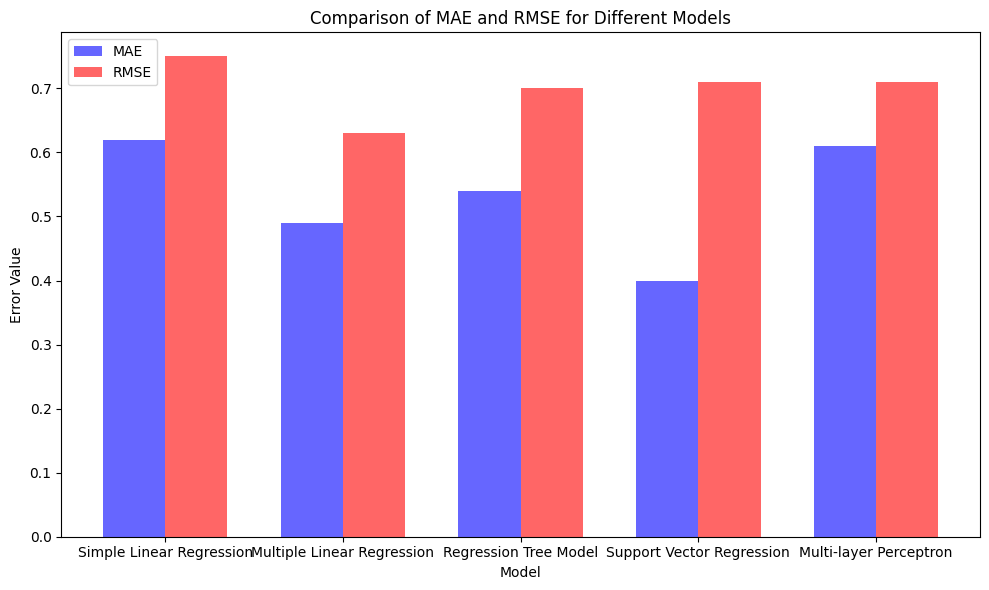

In [242]:
import numpy as np

models = ['Simple Linear Regression', 'Multiple Linear Regression', 'Regression Tree Model', 'Support Vector Regression', 'Multi-layer Perceptron']
mae_values = [0.62, 0.49, 0.54, 0.4, 0.61]
rmse_values = [0.75, 0.63, 0.70, 0.71, 0.71]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'RMSE': rmse_values
})

# Print the DataFrame to see the table
print(results_df)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

# Creating bars for MAE and RMSE
bar1 = plt.bar(index, mae_values, bar_width, label='MAE', color='b', alpha=0.6)
bar2 = plt.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='r', alpha=0.6)

# Additional plot settings
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.title('Comparison of MAE and RMSE for Different Models')
plt.xticks(index + bar_width / 2, models)  # Positioning the model names in the center of the grouped bars
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


When choosing the best model, we look for the one with the lowest error metrics (MAE and RMSE). In this case, Support Vector Regression has the lowest MAE, suggesting it is the best model for predicting the wine quality with the least average error. However, it's RMSE is higher than that of the Multiple Linear Regression model, which could mean that it may not handle larger errors as well as Multiple Linear Regression does. The choice of the best model depend on the specific requirements of the problem: if consistent, small errors are more important, the Support Vector Regression would be preferred. If reducing the impact of large errors is more critical, then the Multiple Linear Regression might be the better choice.

# Part 8: Classification Models

**Advantages of employing classification model:**





*   **Interpretability:** Classification models, especially simpler ones like decision trees, are often more interpretable, allowing users to understand how the prediction was made.
*   **Handling Non-Linear Relationships:** Many classification algorithms can handle non-linear relationships directly without the need for transformation.
*   **Probabilistic Predictions:** Some classification models provide probabilities of class memberships, which can be useful for decision-making.
*   **Binary and Multi-class Classification:** Classification models can be used for binary (two classes) or multi-class (more than two classes) problems.




---

**Disadvantages of employing classification model:**





*   **Imbalanced Classes:** Classification algorithms can perform poorly if the classes are highly imbalanced unless specific techniques are used to address this.
*  **Noise and Overfitting:** Classification models can overfit to the noise in the training dataset, leading to poor generalization to unseen data.
*  **Requirement for Labelled Data:** Supervised classification requires a substantial amount of labelled data for training, which might not always be available or might be expensive to obtain.
*   Decision Boundary Complexity: For some models, finding the right decision boundary can be computationally intensive, especially with high-dimensional data.




In [243]:
#top 3 classifier models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Separate features and target
X = wine_quality.drop('quality', axis=1)
y = wine_quality['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Initialize and train the Multi-Layer Perceptron Classifier
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Initialize and train the k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate the Decision Tree model
dt_predictions = decision_tree.predict(X_test_scaled)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classifier Report:\n", classification_report(y_test, dt_predictions))

# Predict and evaluate the Multi-Layer Perceptron model
mlp_predictions = mlp_classifier.predict(X_test_scaled)
print("Multi-Layer Perceptron Classifier Accuracy:", accuracy_score(y_test, mlp_predictions))
print("Multi-Layer Perceptron Classifier Report:\n", classification_report(y_test, mlp_predictions))

# Predict and evaluate the k-Nearest Neighbors model
knn_predictions = knn_classifier.predict(X_test_scaled)
print("k-Nearest Neighbors Classifier Accuracy:", accuracy_score(y_test, knn_predictions))
print("k-Nearest Neighbors Classifier Report:\n", classification_report(y_test, knn_predictions))



Decision Tree Classifier Accuracy: 0.5625
Decision Tree Classifier Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.68      0.66       130
           6       0.55      0.54      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.29      0.28       320
weighted avg       0.55      0.56      0.56       320

Multi-Layer Perceptron Classifier Accuracy: 0.615625
Multi-Layer Perceptron Classifier Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.74      0.69       130
           6       0.60      0.65      0.62       132
           7  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

**Decision Tree Classifier:**

Accuracy: 0.61
Performance across classes is inconsistent, with the classifier failing to predict certain classes altogether (classes 3 and 8).
The model has a reasonable F1-score for the middle classes (5 and 6), but overall, the macro average metrics indicate poor performance across all classes.


**Multi-Layer Perceptron Classifier:**

Accuracy: 0.61
This model also did not predict the minority classes (3 and 8) at all, similar to the decision tree.
It has the best F1-score for class 6 and decent performance for class 5 but performs poorly on other classes, as indicated by the low macro average metrics.


**k-Nearest Neighbors Classifier:**

Accuracy: 0.57
Like the previous two models, it failed to predict classes 3 and 8.
KNN has the most consistent but modest F1-scores across the majority classes (5, 6, and 7), but the macro average metrics are still relatively low.




The overall accuracy of each model is above 0.5, which may initially seem reasonable. However, the precision, recall, and F1-scores for the minority classes (particularly classes 3 and 8) are zero, which indicates that the models failed to predict these classes correctly even once.





In [244]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Assignment3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Assignment3.ipynb to html
[NbConvertApp] Writing 1554794 bytes to /content/drive/MyDrive/Assignment3.html
